# RDKit Introduction

Author: Karl N. Kirschner

Email: karl.kirschner@h-brs.de

Year: 2021

Requirements:
1. https://www.rdkit.org/
1. https://github.com/rdkit/rdkit

Conda installation and environment creation:

`conda create -c conda-forge -n rdkit rdkit`

## General Information
- What is it? https://www.rdkit.org/docs/Overview.html
    - an open-source toolkit for **cheminformatics**
    - 2D and 3D molecular operations
    - **descriptor generation for machine learning**
    - primarily build on C++ and Python


- Additional source of information:
    - From molecules to code- intro to RDKit (https://sherylli2015.medium.com/from-molecules-to-code-intro-to-rdkit-fedb4f7fb2f4)
    
- Highlights on what it can do
    - molecular text string representations to 2D and 3D representations
    - substructure searches of molecular database
    - molecular "fingerprints" that can be used in machine learning
    - atomic composition and electrostatic similarity between molecules
    
Machine learning - must be able to represent molecules in some numeric/text usable way.

In [3]:
import numpy as np

from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = (300, 300)


## SMILES Molecular Representations

- SMILES (**S**implified **M**olecular-**I**nput **L**ine-**E**ntry **S**ystem)
    - Defines the bonds, and then you infer the hydrogen atoms that are connected.
    - Human readable
    - Several representation for the same molecule (e.g. ethanol: CCO, OCC, C(O)C)


**Versus**
- InChI (**I**nternational **CH**emical **I**dentifier)
    - Defines that hydrogen atoms, and then you infer the bond types.
    - Good at defining stereo centers
    - Not very human readable

**Sources**
1. https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system
2. https://archive.epa.gov/med/med_archive_03/web/html/smiles.html
3. https://www.daylight.com/dayhtml/doc/theory/theory.smiles.html

### SMILES

#### Bonds

`- Single bond (or nothing)`

`= Double bond`

`# Triple bond`

`* Aromatic bond (or lowercase letter)`

`. Disconnected structures`

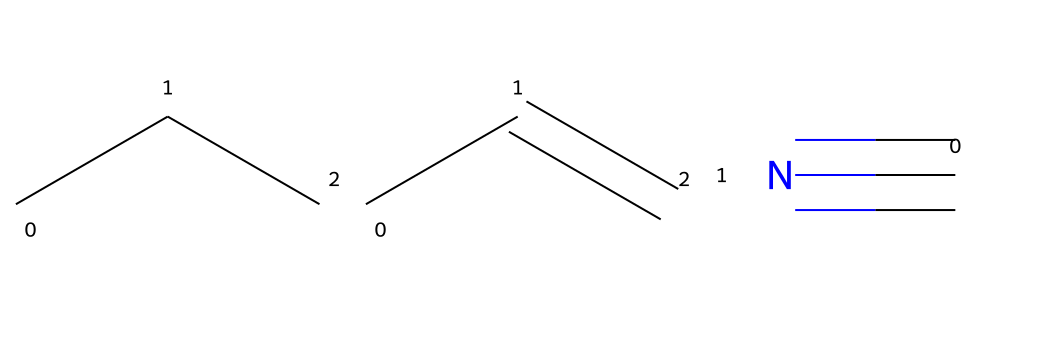

In [4]:
molecules_smile = ['CCC', 'CC=C', 'C#N']

molecule_2d = []

for molec in molecules_smile:
    molecule_2d.append(Chem.MolFromSmiles(molec))
    
## Draw molecules onto a grid
Draw.MolsToGridImage(mols=molecule_2d, molsPerRow=3, subImgSize=(350,350))

#### Branches

- Branch atoms are specified by placing their SMILES symbols in parentheses.
- Place the parentheses directly after the atom that is is attached to.


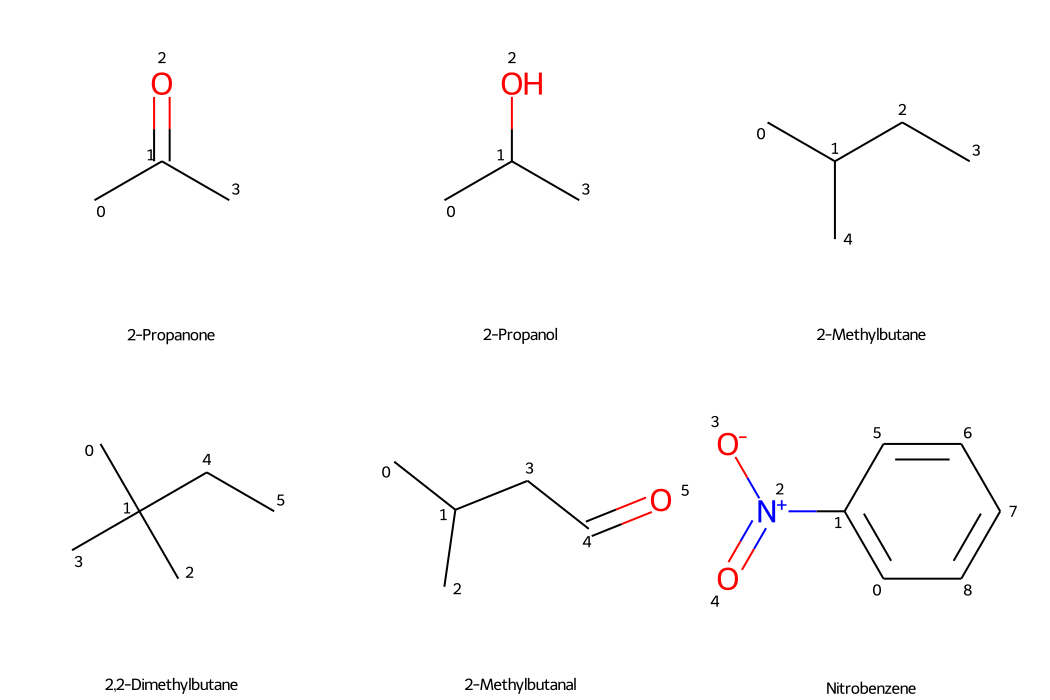

In [5]:
molecules_name = ['2-Propanone', '2-Propanol', 
                  '2-Methylbutane', '2,2-Dimethylbutane',
                  '2-Methylbutanal', 'Nitrobenzene']

molecules_smile = ['CC(=O)C', 'CC(O)C',
                   'CC(CC)C', 'CC(C)(C)CC',
                   'CC(C)CC(=O)', 'c1c(N(=O)=O)cccc1']

molecule_2d = []

for molec in molecules_smile:
    molecule_2d.append(Chem.MolFromSmiles(molec))

## notice the list comprehension
Draw.MolsToGridImage(mols=molecule_2d, molsPerRow=3, subImgSize=(350,350),
                     legends=[name for name in molecules_name])

#### Rings

- Must specify the opening and closing ring atom with a number (e.g. 6-atom ring: C1-C-C-C-C-C1)

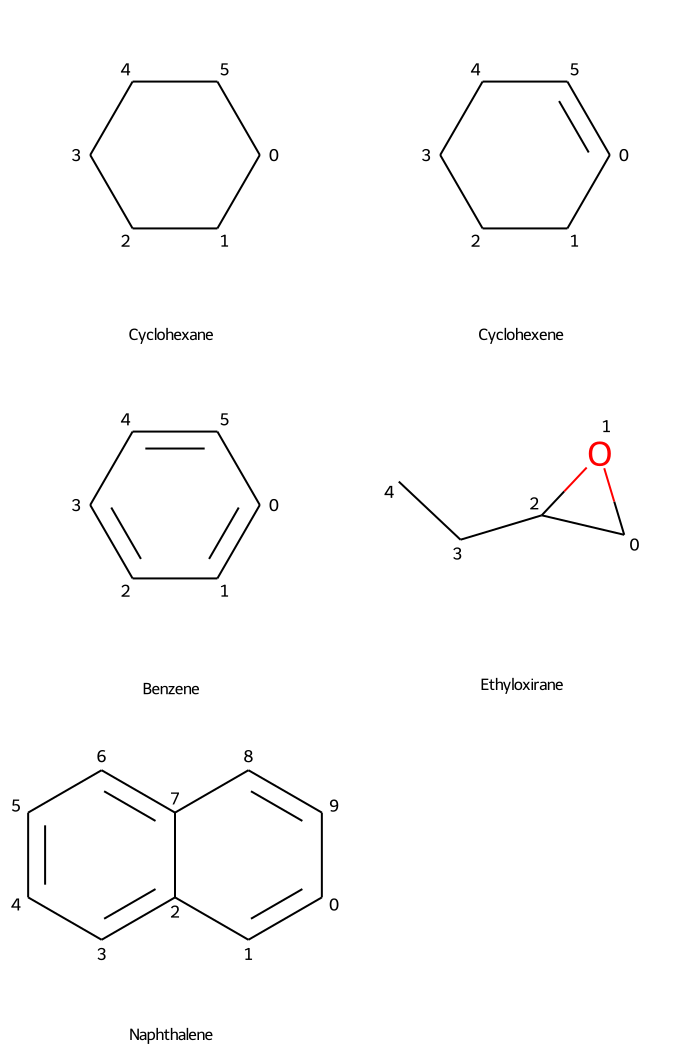

In [6]:
molecules_name = ['Cyclohexane', 'Cyclohexene', 
                  'Benzene', 'Ethyloxirane',
                  'Naphthalene']

molecules_smile = ['C1CCCCC1', 'C=1CCCCC1',
                   'c1ccccc1', 'C1OC1CC',
                   'c1cc2ccccc2cc1']

molecule_2d = []

for molec in molecules_smile:
    molecule_2d.append(Chem.MolFromSmiles(molec))

Draw.MolsToGridImage(mols=molecule_2d, molsPerRow=2, subImgSize=(350,350),
                     legends=[name for name in molecules_name])

#### Charged Atoms

- RDKit can notice formal charges automatically based on the SMILES string
- However these can be overriden
- Use `[A+#]` or `[A-#]` with the atom (i.e. A)

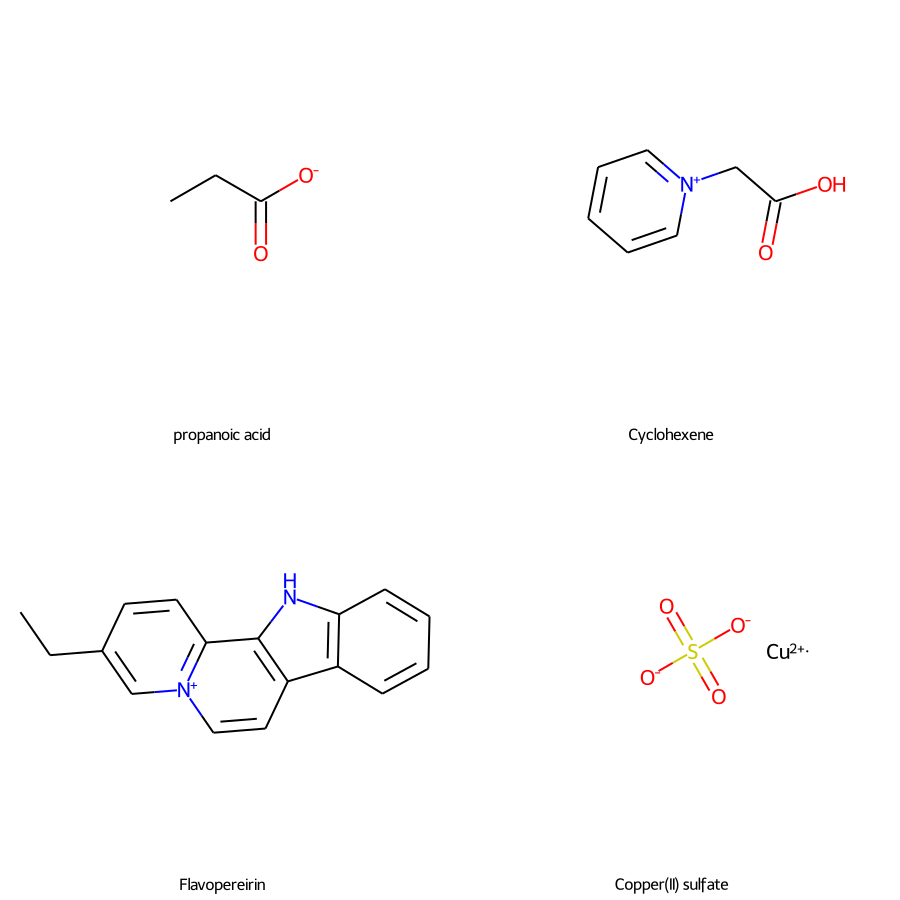

In [10]:
## turn off atom numbers
IPythonConsole.drawOptions.addAtomIndices = False

molecules_name = ['propanoic acid', 'Cyclohexene',
                  'Flavopereirin', 'Copper(II) sulfate']

molecules_smile = ['CCC(=O)[O-1]', 'c1cccc[n+1]1CC(=O)O',
                   'CCc(c1)ccc2[n+1]1ccc3c2[nH]c4c3cccc4', '[Cu+2].[O-1]S(=O)(=O)[O-1]']

molecule_2d = []

for molec in molecules_smile:
    molecule_2d.append(Chem.MolFromSmiles(molec))

Draw.MolsToGridImage(mols=molecule_2d, molsPerRow=2, subImgSize=(450,450),
                     legends=[name for name in molecules_name])

#### Configuration Around Double Bonds (cis vs. trans)

- Single bonds next to double bonds may be represented using `/` or `\` to indicate stereochemical configuration

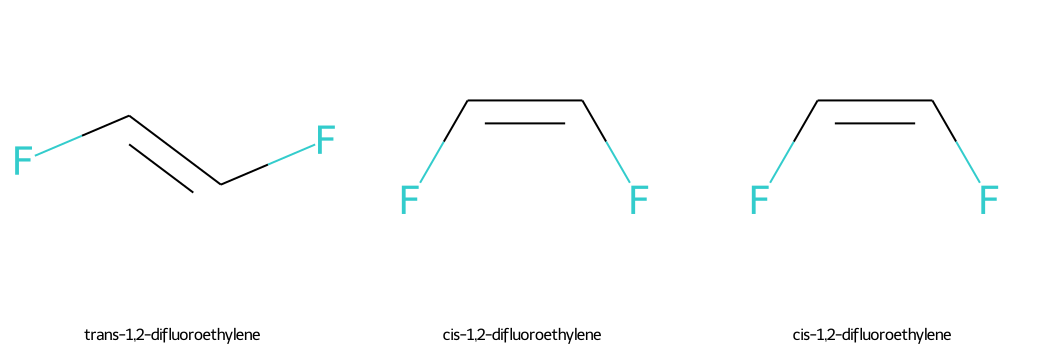

In [11]:
molecules_name = ['trans-1,2-difluoroethylene', 'cis-1,2-difluoroethylene', 'cis-1,2-difluoroethylene']

molecules_smile = ['F/C=C/F', 'F/C=C\F', 'F\C=C/F']

molecule_2d = []

for molec in molecules_smile:
    molecule_2d.append(Chem.MolFromSmiles(molec))

Draw.MolsToGridImage(mols=molecule_2d, molsPerRow=3, subImgSize=(350,350),
                     legends=[name for name in molecules_name])

### Highlighting substructure

In [ ]:
substructure = Chem.MolFromSmarts('C=O')
print(acetic_acid.GetSubstructMatches(substructure))
acetic_acid

## Basic Informations about the molecule

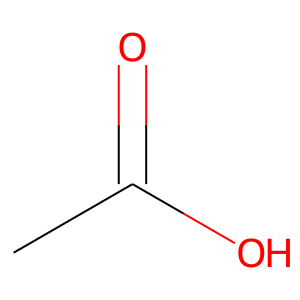

In [14]:
acetic_acid = Chem.MolFromSmiles('CC(=O)O')
acetic_acid

Number of heavy atoms (i.e. not hydrogens yet):

In [37]:
acetic_acid.GetNumAtoms(onlyExplicit=True)

4

Number of all atoms:

In [38]:
acetic_acid.GetNumAtoms(onlyExplicit=False)

8

Atomic numbers (i.e. element numbers) and symbols:

In [44]:
for atom in acetic_acid.GetAtoms():
    print(atom.GetAtomicNum(), atom.GetSymbol())

6 C
6 C
8 O
8 O


## Atom connectivity via the Adjacency Matrix Represenation

- Demo how to obtain help in Python3

In [41]:
help(Chem.GetAdjacencyMatrix)

Help on built-in function GetAdjacencyMatrix in module rdkit.Chem.rdmolops:

GetAdjacencyMatrix(...)
    GetAdjacencyMatrix( (Mol)mol [, (bool)useBO=False [, (int)emptyVal=0 [, (bool)force=False [, (str)prefix='']]]]) -> object :
        Returns the molecule's adjacency matrix.
        
          ARGUMENTS:
        
            - mol: the molecule to use
        
            - useBO: (optional) toggles use of bond orders in calculating the matrix.
              Default value is 0.
        
            - emptyVal: (optional) sets the elements of the matrix between non-adjacent atoms
              Default value is 0.
        
            - force: (optional) forces the calculation to proceed, even if there is a cached value.
              Default value is 0.
        
            - prefix: (optional, internal use) sets the prefix used in the property cache
              Default value is .
        
          RETURNS: a Numeric array of floats containing the adjacency matrix
        
       

<img src="00_images/DavidTME2020_Fig1.png" width=980 height=None/>

source: https://jcheminf.biomedcentral.com/articles/10.1186/s13321-020-00460-5/figures/1

In [42]:
Chem.GetAdjacencyMatrix(acetic_acid)

array([[0, 1, 0, 0],
       [1, 0, 1, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0]], dtype=int32)

## Misc. Helpful Commands

#### Add explicit hydrogens to a molecule:

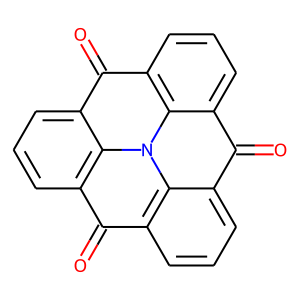

In [46]:
molecule = Chem.MolFromSmiles('c16c2cccc6c(=O)c5cccc3c5n1c4c(c3=O)cccc4c2=O')
molecule

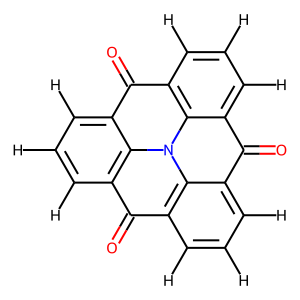

In [47]:
molecule_h = Chem.AddHs(molecule)
molecule_h

### Generate 3D structures
- need AllChem to be imported
- `EmbedMolecule` - generates the 3D coordinates
- `MolToXYZBlock` - puts the coordinates into a "XYZ" file format (i.e. visualize using an external program like PyMol)
- Other format options include:
    - `MolToPDBBlock`
    - `MolToMolBlock`

In [48]:
## EmbedMolecule will generate 3D Cartesian coordinates
## The random seed allows reproducibility of the resulting coordinates

AllChem.EmbedMolecule(mol=molecule_h, randomSeed=6)

print(Chem.MolToXYZBlock(mol=molecule_h))

34

C     -0.827062   -1.067927    0.038165
C     -0.350355   -2.362446   -0.073141
C     -1.211056   -3.437164   -0.031700
C     -2.565295   -3.275283    0.120132
C     -3.055832   -1.994179    0.232283
C     -2.189202   -0.924153    0.189994
C     -2.692751    0.375594    0.304415
O     -3.931735    0.545212    0.444333
C     -1.854213    1.472333    0.266373
C     -2.362070    2.750268    0.380228
C     -1.546880    3.855868    0.345080
C     -0.193772    3.642474    0.190961
C      0.324812    2.364248    0.075951
C     -0.490656    1.247967    0.110624
N      0.004958    0.001979   -0.000439
C      1.334655   -0.178431   -0.150526
C      2.212930    0.886375   -0.194297
C      1.695040    2.159568   -0.079590
O      2.467598    3.136887   -0.116186
C      3.584974    0.673586   -0.350407
C      4.102331   -0.579109   -0.464091
C      3.248029   -1.649850   -0.423149
C      1.885263   -1.449066   -0.268590
C      1.024357   -2.530730   -0.227453
O      1.432327   -3.705983   -0.325

Save the molecule to a file:

In [49]:
Chem.MolToXYZFile(mol=molecule_h, filename='example_output_3d.xyz', confId=0)

### Minimize the molecule using a built in force field
- `MMFFOptimizeMolecule`
    - RETURNS
        - 0 if the optimization converged,
        - -1 if the forcefield could not be set up
        - 1 if more iterations are required

In [50]:
AllChem.MMFFOptimizeMolecule(mol=molecule_h, confId=0,
                             mmffVariant='MMFF', maxIters=200, nonBondedThresh=100)

0

Now save the optimized sturcture to a file so that we can compare the input vs optimize coordinates (e.g. using PyMol, Avagadro, or nglview).

In [53]:
Chem.MolToXYZFile(mol=molecule_h, filename='example_output_3d_opt.xyz', confId=0)

### Multiple 3D Conformations
- `EmbedMultipleConfs`

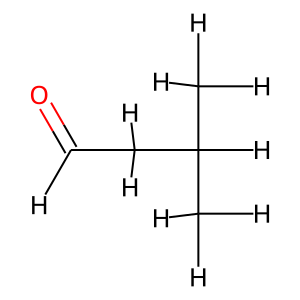

In [54]:
methylbutanal = Chem.MolFromSmiles('CC(C)CC(=O)')
methylbutanal_h = Chem.AddHs(methylbutanal)
methylbutanal_h

In [55]:
conformations = 2
AllChem.EmbedMultipleConfs(mol=methylbutanal_h, numConfs=conformations, randomSeed=6, clearConfs=True)

Now specify which conformation you would like to look at via `MolToMolBlock`'s `confID`:

In [56]:
for conf in range(0, 2, 1):
    print(Chem.MolToXYZBlock(mol=methylbutanal_h, confId=conf))
    
    Chem.MolToXYZFile(mol=methylbutanal_h, filename=f'example_output_methylbutanal_conf_{conf}.xyz', confId=conf)

16

C     -1.312811   -1.042605    0.615241
C     -0.355561   -0.255881   -0.251709
C     -0.816549    1.184101   -0.250087
C      1.051956   -0.404278    0.268589
C      2.009755    0.363112   -0.571670
O      3.197726    0.383443   -0.332804
H     -0.900458   -2.014716    0.938734
H     -2.247865   -1.167210   -0.003914
H     -1.549653   -0.434439    1.515905
H     -0.346412   -0.628976   -1.306404
H     -1.797049    1.312110    0.268813
H     -0.084777    1.792889    0.326789
H     -0.968917    1.575466   -1.283853
H      1.319995   -1.476111    0.174290
H      1.139699   -0.113487    1.317030
H      1.660921    0.926581   -1.424951

16

C     -1.273683    1.223631    0.339309
C     -0.339367    0.192104   -0.290554
C     -0.891389   -1.203136   -0.165989
C      0.981527    0.343729    0.423021
C      1.988023   -0.593901   -0.106130
O      2.990582   -0.258129   -0.724883
H     -2.228599    1.289633   -0.165063
H     -0.735630    2.184863    0.237374
H     -1.360053    1.050919    

- Minimize all of the generated conformations using `MMFFOptimizeMoleculeConfs`.
- Save them to different files.

In [57]:
help(AllChem.MMFFOptimizeMoleculeConfs)

Help on built-in function MMFFOptimizeMoleculeConfs in module rdkit.Chem.rdForceFieldHelpers:

MMFFOptimizeMoleculeConfs(...)
    MMFFOptimizeMoleculeConfs( (Mol)self [, (int)numThreads=1 [, (int)maxIters=200 [, (str)mmffVariant='MMFF94' [, (float)nonBondedThresh=100.0 [, (bool)ignoreInterfragInteractions=True]]]]]) -> object :
        uses MMFF to optimize all of a molecule's conformations
        
         
         ARGUMENTS:
        
            - mol : the molecule of interest
            - numThreads : the number of threads to use, only has an effect if the RDKit
                           was built with thread support (defaults to 1)
                           If set to zero, the max supported by the system will be used.
            - maxIters : the maximum number of iterations (defaults to 200)
            - mmffVariant : "MMFF94" or "MMFF94s"
            - nonBondedThresh : used to exclude long-range non-bonded
                          interactions (defaults to 100.0)
       

In [58]:
AllChem.MMFFOptimizeMoleculeConfs(methylbutanal_h, maxIters=200, nonBondedThresh=100)

for conf in range(0, 2, 1):
    Chem.MolToXYZFile(mol=methylbutanal_h, filename=f'example_output_methylbutanal_conf_{conf}_opt.xyz',
                      confId=conf)

## Coulomb Matrix

In [59]:
from rdkit.Chem.rdMolDescriptors import CalcCoulombMat

Information about what a Coulomb matrix is: https://singroup.github.io/dscribe/0.3.x/tutorials/coulomb_matrix.html#cm

A Coulomb matrix is a simple molecular descriptor that attempts to model the electrostatic interaction between nuclei.

The off-diagonal elements represent the Coulomb repulsion between two different nuclei.

Let's take a quick example using methonol, whose XYZ-coordinates are shown in the following:

`atom X Y Z`  

`C1  -0.730 -0.031 -0.003`  
`H2  -1.105 -0.580 -0.864`  
`H3  -1.127  0.973 -0.040`  
`H4  -1.095 -0.512  0.902`  
`O5   0.665  0.075 -0.014`  
`H6   1.047 -0.790  0.017`  

To compute the Coulomb matrix values, one uses the following equations:


<font color='red'>
$M_{ij}^{\text{Coulomb}} = 0.5 Z_i^{2.4}$ when i = j (i.e. the diagonal components)

$M_{ij}^{\text{Coulomb}} = \frac{Z_i Z_j}{R_{ij}}$ when i != j (i.e. the off-diagonal components)
</font>


Coulomb matrix for Methanol. The atomic "self interactions" are on the diagonal in boldface font.
(**Note**" the following was made using RDKit)

The atomic sequence corresponds to the XYZ-coordinates listed above.

$
  M_{ij}=
  \left[ {\begin{array}{ccccc}
\textbf{36.86} & 5.52 & 5.55 & 5.52 & 34.31 & 3.10\\
5.52 & \textbf{0.50} & 0.57 & 0.57 & 3.86 & 0.43\\
5.55 & 0.57 & \textbf{0.50} & 0.57 & 3.99 & 0.36\\
5.52 & 0.57 & 0.57 & \textbf{0.50} & 3.87 & 0.43\\
34.31 & 3.86 & 3.99 & 3.87 & \textbf{73.52} & 8.46\\
3.10 & 0.43 & 0.36 & 0.43 & 8.46 & \textbf{0.50}\\
  \end{array} } \right]
$

<!-- $
  M_{ij}=
  \left[ {\begin{array}{ccccc}
C1-C1 & C1-H2 & C1-H3 & C1-H4 & C1-O5 & C1-H6\\
H2-C1 & H2-H2 & H2-H3 & H2-H4 & H2-O5 & H2-H6\\
H3-C1 & H3-H2 & H3-H3 & H3-H4 & H3-O5 & H3-H6\\
H4-C1 & H4-H2 & H4-H3 & H4-H4 & H4-O5 & H4-H6\\
O5-C1 & O5-H2 & O5-H3 & O5-H3 & O5-O5 & O5-H6\\
H6-C1 & H6-H2 & H6-H3 & H6-H3 & H6-H4 & H6-H6\\
  \end{array} } \right]
$ -->

$
  M_{ij}=
  \left[ {\begin{array}{ccccc}
C1-C1 & C1-H2 & C1-H3 & C1-H4 & C1-O5 & C1-H6\\
 & H2-H2 & H2-H3 & H2-H4 & H2-O5 & H2-H6\\
 &  & H3-H3 & H3-H4 & H3-O5 & H3-H6\\
 &  &  & H4-H4 & H4-O5 & H4-H6\\
 &  &  &  & O5-O5 & O5-H6\\
 &  &  &  &  & H6-H6\\
  \end{array} } \right]
$

To obtain the numbers, the C1-C1 interaction would be:

In [60]:
print(f'Not rounded: {0.5*(6.0**2.4)     }')
print(f'Rounded:     {0.5*(6.0**2.4):0.2f}')

Not rounded: 36.85810519942594
Rounded:     36.86


Let's do this now directly from a SMILES string.

Note: the atomic sequence is different from the above.

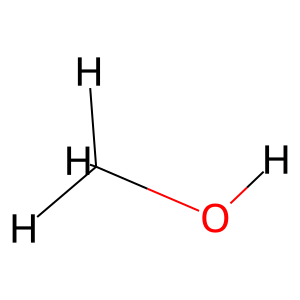

In [61]:
smiles = 'CO'

methanol = Chem.MolFromSmiles(smiles, sanitize=True)
methanol = Chem.AddHs(methanol)

AllChem.EmbedMolecule(methanol)

AllChem.UFFOptimizeMolecule(methanol)

methanol

In [62]:
CM = CalcCoulombMat(methanol)
list(CM[0])

[36.85810519942594,
 34.32354714063252,
 5.397234708752441,
 5.3972379016603265,
 5.408240037623787,
 3.117086646378865]

In [66]:
for atom_list in range(0, len(CM), 1):
    atom_list_rounded = [f"{number:.2f}" for number in list(CM[atom_list])]
    print(atom_list_rounded)
    
    # print(list(CM[atom_list])) ## not rounded numbers

['36.86', '34.32', '5.40', '5.40', '5.41', '3.12']
['34.32', '73.52', '3.87', '3.87', '3.90', '8.06']
['5.40', '3.87', '0.50', '0.55', '0.55', '0.44']
['5.40', '3.87', '0.55', '0.50', '0.55', '0.44']
['5.41', '3.90', '0.55', '0.55', '0.50', '0.35']
['3.12', '8.06', '0.44', '0.44', '0.35', '0.50']


Okay, now lets do some linear algebra to obtain the distance between two points (i.e. atoms) in Cartesian space:
- numpy.linalg.norm: https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html

In [80]:
molecule = methanol.GetConformer()

## extract the x,y,z positions of the two atoms:
at1Coords = np.array(molecule.GetAtomPosition(0))
at2Coords = np.array(molecule.GetAtomPosition(2))

print(f'{at1Coords}\n'
      f'{at2Coords}')

[-0.35770023  0.00759022 -0.02148174]
[-0.54683347  0.07179144  1.07210873]


In [81]:
at1_at2_distance = np.linalg.norm(at2Coords - at1Coords)
at1_at2_distance

1.1116803926036574

To obtain the numbers, the off-diagonal cross-interaction terms would be (e.g. C1-H2):

In [82]:
print(f'Not rounded: {(6.0*1.0)/at1_at2_distance     }')
print(f'Rounded:     {(6.0*1.0)/at1_at2_distance:0.2f}')

Not rounded: 5.397234708752441
Rounded:     5.40


Coulomb matrix can be used to predict the atomization energy (i.e. $\Delta$E molecule -> individual atoms) of molecules.
- https://arxiv.org/pdf/1904.10321.pdf

## Molecular Fingerprint and Similarity
- "The default similarity metric used by rdkit.DataStructs.FingerprintSimilarity() is the Tanimoto similarity."

Source: https://www.rdkit.org/docs/GettingStartedInPython.html

In [83]:
from rdkit import DataStructs

In [84]:
molecules_smile = ['CCOC', 'CCO', 'COC']

molecule_2d = []

for molec in molecules_smile:
    molecule_2d.append(Chem.MolFromSmiles(molec))

In [85]:
## Could have done the same above as:
#molecule_2d = [Chem.MolFromSmiles('CCOC'), Chem.MolFromSmiles('CCO'), Chem.MolFromSmiles('COC')]

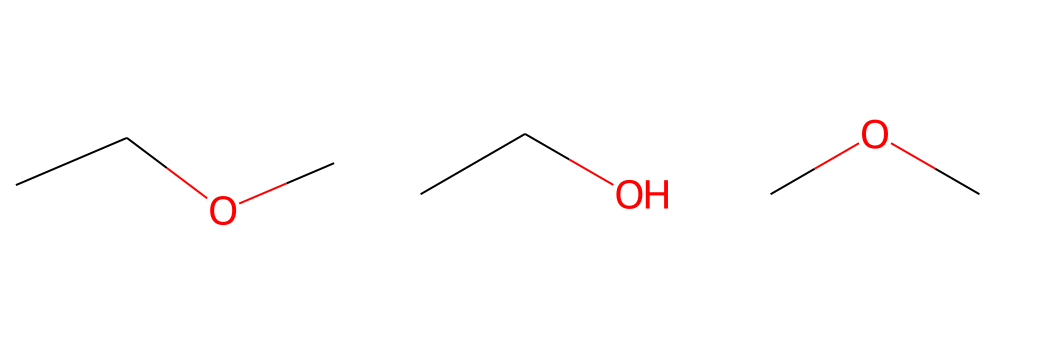

In [86]:
Draw.MolsToGridImage(mols=molecule_2d, molsPerRow=3, subImgSize=(350,350))

In [87]:
fingerprints = [Chem.RDKFingerprint(mol=molecule) for molecule in molecule_2d]
fingerprints

Compute the similarity between CCOC (i.e. `fingerprints[0]` below) and CCO, and CCOC and COC: 

In [91]:
similarity_tanimoto = []

for fp in range(0, len(fingerprints), 1):
    similarity = DataStructs.FingerprintSimilarity(fingerprints[0], fingerprints[fp])
    similarity_tanimoto.append(similarity)

similarity_tanimoto

[1.0, 0.6, 0.4]

Thus, according to a Tanimoto similarity calculations

The similirity between the molecules are:

1. CCOC to CCOC = 1.0 (as it shoudl be)
1. CCOC to CCO = 0.6
1. CCOC to COC = 0.4

However, one can explore different similarity calculations:

**Similarity metrics include:**
1. Tanimoto
1. Dice
1. Cosine
1. Sokal
1. Russel
1. Kulczynski
1. McConnaughey
1. Tversky

For example, if one wanted to use Dice instead:

In [93]:
similarity_dice = []

for fp in range(0, len(fingerprints), 1):
    similarity = DataStructs.FingerprintSimilarity(fingerprints[0], fingerprints[fp],
                                                   metric=DataStructs.DiceSimilarity)
    similarity_dice.append(similarity)

similarity_dice

[1.0, 0.75, 0.5714285714285714]

Or McConnaughey:

In [95]:
similarity_mcconnaughey = []

for fp in range(0, len(fingerprints), 1):
    similarity = DataStructs.FingerprintSimilarity(fingerprints[0], fingerprints[fp],
                                                   metric=DataStructs.McConnaugheySimilarity)
    similarity_mcconnaughey.append(similarity)

similarity_mcconnaughey

[1.0, 0.6, 0.4]

#### Additional Details About Fingerprints: what is happening "under the hood"
- https://www.rdkit.org/docs/source/rdkit.Chem.rdmolops.html#rdkit.Chem.rdmolops.RDKFingerprint

RDKit's fignerprint is a "Daylight-like" substructure fingerprint (https://www.daylight.com/dayhtml/doc/theory/theory.finger.html)
- a bit vector
    - each bit is represents a particular substructure within a molecule

- Default settings: consider substructures that are a maximum of 7 bonds long (maxPath default=7)

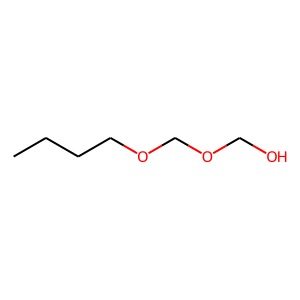

In [96]:
smiles_1 = 'CCCCOCOCO'
molecule_1 = Chem.MolFromSmiles(smiles_1)
molecule_1

In [97]:
bit_info_1 = {}

fingerprints_1 = Chem.RDKFingerprint(mol=molecule_1, maxPath=5, bitInfo=bit_info_1)

## First 10 bits set
list(fingerprints_1.GetOnBits())[:10]

[121, 146, 189, 308, 336, 338, 407, 562, 568, 621]

In [98]:
fingerprints_1.ToBitString()

'000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000001000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000101000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000010000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000100000000000000000000000000000000000000001000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000

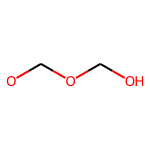

In [99]:
## using the bit_info dictionary populated by RDKit prepare a visualisation

Draw.DrawRDKitBit(molecule_1, 338, bit_info_1)

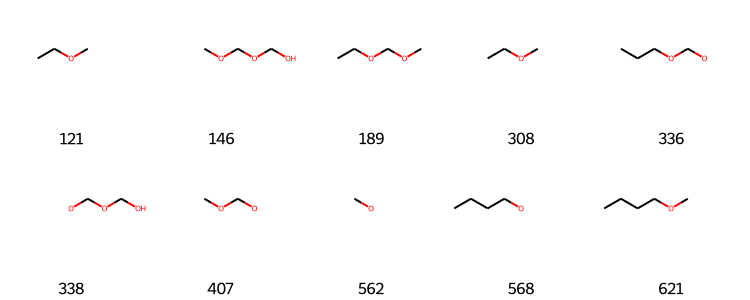

In [100]:
## draw multiple bits (12)
bit_tuple_1 = [(molecule_1, bit, bit_info_1) for bit in bit_info_1]
Draw.DrawRDKitBits(bit_tuple_1[:10], molsPerRow=5, legends=[str(bit) for bit in bit_info_1][:10])

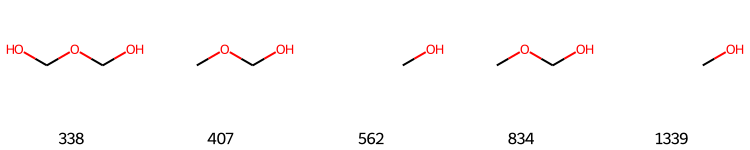

In [101]:
smiles_2 = 'OCOCO'
molecule_2 = Chem.MolFromSmiles(smiles_2)
molecule_2

bit_info_2 = {}
fingerprints = Chem.RDKFingerprint(mol=molecule_2, maxPath=5, bitInfo=bit_info_2)

## draw multiple bits (12)
bit_tuple_2 = [(molecule_2, bit, bit_info_2) for bit in bit_info_2]
Draw.DrawRDKitBits(bit_tuple_2[:5], molsPerRow=5, legends=[str(bit) for bit in bit_info_2][:5])